Mounting Google Drive

In [2]:

!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [1]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


from utils import (
   test, train, plot_losses

)

from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR
%matplotlib inline

Updating Device to CUDA

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #c2

CUDA Available? True


Defining data tranformations

In [4]:
train_transforms = transforms.Compose([
   #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    #transforms.Resize((28, 28)),
    #transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])



Downloading MNIST dataset and splitting to train and test set

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 85441247.93it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 7204454.25it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24365543.13it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19399723.80it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Creating Data Loaders from train data and test data

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

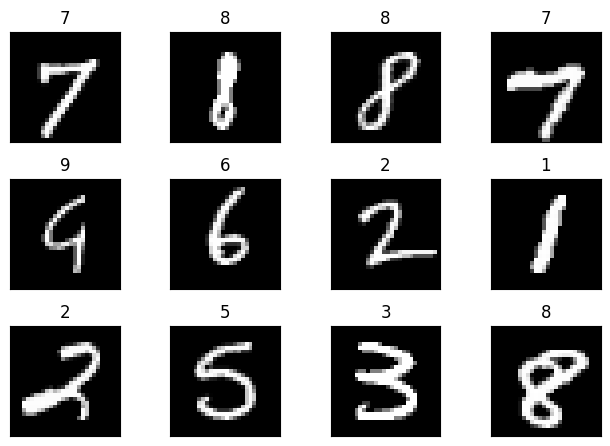

In [7]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

## Data Statistics

torch.Size([512, 1, 28, 28])
torch.Size([512])


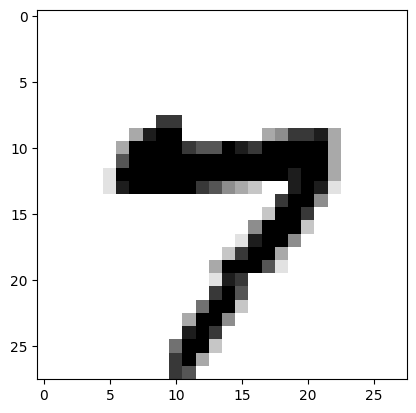

In [8]:
# train_data1 = train_data.train_data
# train_data = train_data.transform(train_data1.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train_data.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train_data.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

Viewing images

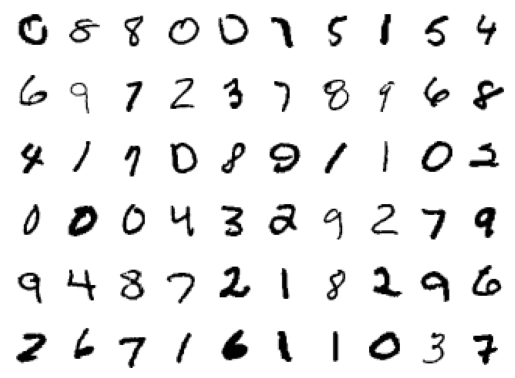

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Transferring model to GPU and printing model summary

In [10]:
model1 = Net().to(device)
summary(model1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,440
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5           [-1, 16, 22, 22]           2,304
              ReLU-6           [-1, 16, 22, 22]               0
         MaxPool2d-7           [-1, 16, 11, 11]               0
            Conv2d-8           [-1, 16, 11, 11]             256
              ReLU-9           [-1, 16, 11, 11]               0
           Conv2d-10             [-1, 24, 9, 9]           3,456
             ReLU-11             [-1, 24, 9, 9]               0
           Conv2d-12             [-1, 24, 7, 7]           5,184
             ReLU-13             [-1, 24, 7, 7]               0
           Conv2d-14             [-1, 1

Training and evaluating the model

In [11]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=2.3007 Batch_id=117 Accuracy=13.37: 100%|██████████| 118/118 [00:18<00:00,  6.40it/s]


Test set: Average loss: 2.3003, Accuracy: 1797/10000 (17.97%)

EPOCH: 1


Train: Loss=0.4717 Batch_id=117 Accuracy=41.90: 100%|██████████| 118/118 [00:14<00:00,  7.97it/s]


Test set: Average loss: 0.4881, Accuracy: 8510/10000 (85.10%)

EPOCH: 2


Train: Loss=0.1442 Batch_id=117 Accuracy=90.38: 100%|██████████| 118/118 [00:16<00:00,  7.06it/s]


Test set: Average loss: 0.2016, Accuracy: 9395/10000 (93.95%)

EPOCH: 3


Train: Loss=0.1203 Batch_id=117 Accuracy=94.42: 100%|██████████| 118/118 [00:16<00:00,  7.33it/s]


Test set: Average loss: 0.1372, Accuracy: 9575/10000 (95.75%)

EPOCH: 4


Train: Loss=0.0605 Batch_id=117 Accuracy=95.83: 100%|██████████| 118/118 [00:15<00:00,  7.46it/s]


Test set: Average loss: 0.1067, Accuracy: 9678/10000 (96.78%)

EPOCH: 5


Train: Loss=0.1378 Batch_id=117 Accuracy=96.69: 100%|██████████| 118/118 [00:15<00:00,  7.84it/s]


Test set: Average loss: 0.0908, Accuracy: 9721/10000 (97.21%)

EPOCH: 6


Train: Loss=0.0300 Batch_id=117 Accuracy=97.20: 100%|██████████| 118/118 [00:15<00:00,  7.83it/s]


Test set: Average loss: 0.0799, Accuracy: 9749/10000 (97.49%)

EPOCH: 7


Train: Loss=0.0234 Batch_id=117 Accuracy=97.45: 100%|██████████| 118/118 [00:16<00:00,  6.97it/s]


Test set: Average loss: 0.0773, Accuracy: 9744/10000 (97.44%)

EPOCH: 8


Train: Loss=0.0450 Batch_id=117 Accuracy=97.65: 100%|██████████| 118/118 [00:18<00:00,  6.48it/s]


Test set: Average loss: 0.0709, Accuracy: 9774/10000 (97.74%)

EPOCH: 9


Train: Loss=0.1371 Batch_id=117 Accuracy=97.93: 100%|██████████| 118/118 [00:18<00:00,  6.27it/s]


Test set: Average loss: 0.0617, Accuracy: 9799/10000 (97.99%)

EPOCH: 10


Train: Loss=0.1162 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:15<00:00,  7.76it/s]


Test set: Average loss: 0.0609, Accuracy: 9807/10000 (98.07%)

EPOCH: 11


Train: Loss=0.0529 Batch_id=117 Accuracy=98.17: 100%|██████████| 118/118 [00:16<00:00,  6.99it/s]


Test set: Average loss: 0.0487, Accuracy: 9841/10000 (98.41%)

EPOCH: 12


Train: Loss=0.0299 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:15<00:00,  7.68it/s]


Test set: Average loss: 0.0483, Accuracy: 9840/10000 (98.40%)

EPOCH: 13


Train: Loss=0.0881 Batch_id=117 Accuracy=98.39: 100%|██████████| 118/118 [00:15<00:00,  7.67it/s]


Test set: Average loss: 0.0511, Accuracy: 9830/10000 (98.30%)

EPOCH: 14


Train: Loss=0.0532 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:16<00:00,  7.34it/s]


Test set: Average loss: 0.0408, Accuracy: 9872/10000 (98.72%)

EPOCH: 15


Train: Loss=0.0472 Batch_id=117 Accuracy=98.59: 100%|██████████| 118/118 [00:16<00:00,  7.15it/s]


Test set: Average loss: 0.0433, Accuracy: 9841/10000 (98.41%)

EPOCH: 16


Train: Loss=0.0572 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:16<00:00,  7.33it/s]


Test set: Average loss: 0.0448, Accuracy: 9855/10000 (98.55%)

EPOCH: 17


Train: Loss=0.0559 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:15<00:00,  7.64it/s]


Test set: Average loss: 0.0415, Accuracy: 9871/10000 (98.71%)

EPOCH: 18


Train: Loss=0.0625 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:15<00:00,  7.65it/s]


Test set: Average loss: 0.0409, Accuracy: 9862/10000 (98.62%)

EPOCH: 19


Train: Loss=0.0181 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:17<00:00,  6.89it/s]


Test set: Average loss: 0.0410, Accuracy: 9866/10000 (98.66%)



## Plot Losses

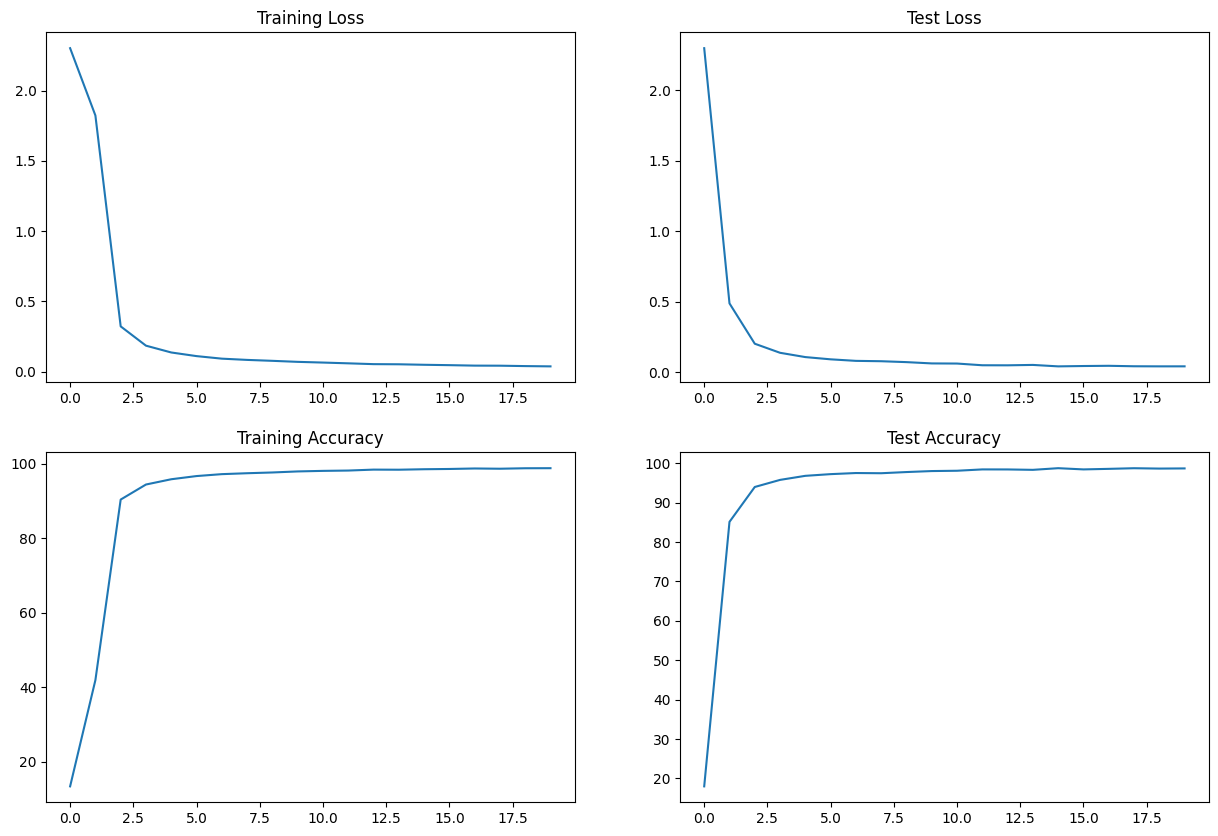

In [12]:
plot_losses()

# Objective:

* Make the model lighter

# Results:
* Total Parameters: 20.9k

* Best Training Accuracy: 98.78

* Best Test Accuracy: 98.72

#Analysis:
Good model which is comparitively lighter model. No overfitting